In [1]:
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

In [2]:
d2l.use_svg_display()

In [3]:
class FashionMNIST(d2l.DataModule):
    def __init__(self, batch_size = 64, resize = (28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize), transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(root = self.root, train = True, transform= trans, download= True )
        self.val = torchvision.datasets.FashionMNIST(root = self.root, train= False, transform= trans, download= True)

In [4]:
data = FashionMNIST(resize=(32,32))
len(data.train)

100.0%


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



60000

In [5]:
len(data.val)

10000

In [6]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [7]:
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [13]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle = train, num_workers = self.num_workers)

In [14]:
X,y = next(iter(data.train_dataloader()))

print(X.shape)
print(y.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [15]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows = 1, ncols = 8, labels = []):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1),nrows, ncols,titles= labels)

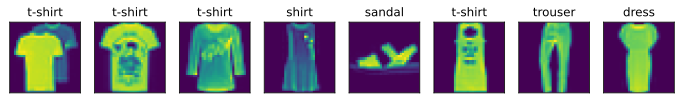

In [16]:
batch = next(iter(data.train_dataloader()))

data.visualize(batch)

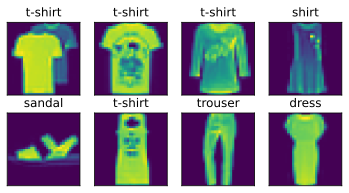

In [17]:
data.visualize(batch, nrows= 2, ncols= 4)